In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv('data.csv')
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [107]:
df = df.drop(columns=['Country','Year','Status','percentage expenditure',' BMI ','Total expenditure','GDP','Population','Income composition of resources'])

In [108]:
df.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'Hepatitis B', 'Measles ', 'under-five deaths ', 'Polio', 'Diphtheria ',
       ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years',
       'Schooling'],
      dtype='object')

In [109]:
df.rename(columns = {'Life expectancy ':'life expectancy' , 'Adult Mortality':'adult mortality' ,'Alcohol':'alcohol' , 'Hepatitis B':'hepatitis b' ,'Measles ':'measles' , 'under-five deaths ':'under five deaths' ,'Polio':'polio' , 'Diphtheria ':'diphtheria' ,' HIV/AIDS':'hiv/aids' , ' thinness  1-19 years':'thinness 1-19 years' ,' thinness 5-9 years':'thinness 5-9 years' , 'Schooling':'schooling'} , inplace=True)

In [110]:
df.columns

Index(['life expectancy', 'adult mortality', 'infant deaths', 'alcohol',
       'hepatitis b', 'measles', 'under five deaths', 'polio', 'diphtheria',
       'hiv/aids', 'thinness 1-19 years', 'thinness 5-9 years', 'schooling'],
      dtype='object')

Data Cleaning

In [111]:
df.duplicated().sum()

0

In [112]:
df.isnull().sum()

life expectancy          6
adult mortality          6
infant deaths            0
alcohol                136
hepatitis b            370
measles                  0
under five deaths        0
polio                   11
diphtheria              11
hiv/aids                 0
thinness 1-19 years     24
thinness 5-9 years      24
schooling              109
dtype: int64

In [65]:
#-----------------life expectancy--------------------

df['life_mean'] = df['life expectancy'].fillna(df['life expectancy'].mean())
df['life_median'] = df['life expectancy'].fillna(df['life expectancy'].median())

In [66]:
print('life expectancy variance',df['life expectancy'].var())
print('life_mean variance',df['life_mean'].var())
print('life_median variance',df['life_median'].var())

life expectancy variance 89.24759418633725
life_mean variance 88.98701726900484
life_median variance 89.00991260757192


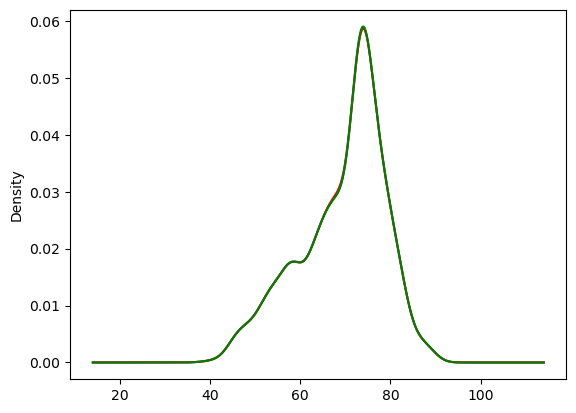

In [11]:
plt.subplot(111)
df['life expectancy'].plot.kde()

df['life_mean'].plot.kde(color='red')

df['life_median'].plot.kde(color='green')

plt.show()

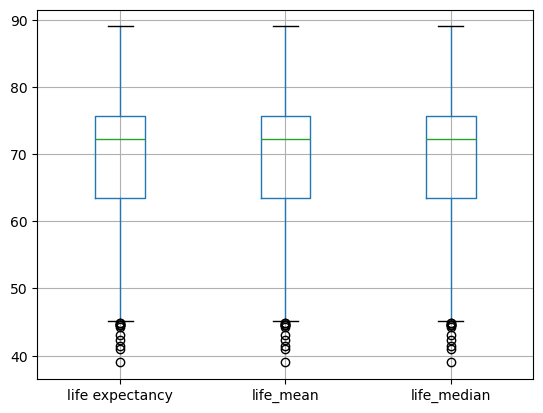

In [12]:
df[['life expectancy','life_mean','life_median']].boxplot()
plt.show()

In [13]:
df = df.drop(columns=['life_mean','life_median'])

In [14]:
#--------------------------adult mortality-------------------

df['adult_mean'] = df['adult mortality'].fillna(df['adult mortality'].mean())
df['adult_median'] = df['adult mortality'].fillna(df['adult mortality'].median())

In [15]:
print('adult mortality variance',df['adult mortality'].var())
print('adult_mean variance',df['adult_mean'].var())
print('adult_median variance',df['adult_median'].var())

adult mortality variance 15147.583834112995
adult_mean variance 15103.357311969596
adult_median variance 15104.486723091637


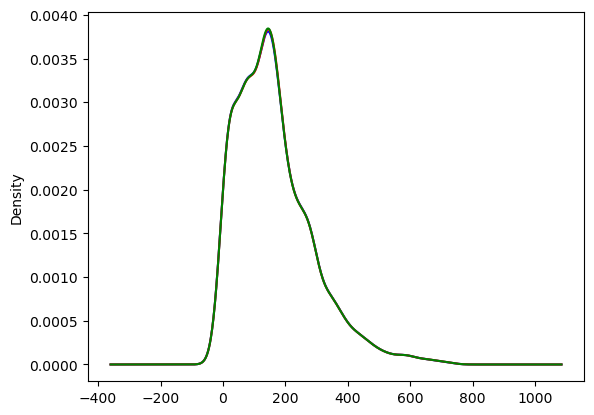

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['adult mortality'].plot.kde(ax=ax , color='blue')

df['adult_mean'].plot.kde(ax=ax , color='red')

df['adult_median'].plot.kde(ax=ax , color='green')
plt.show()

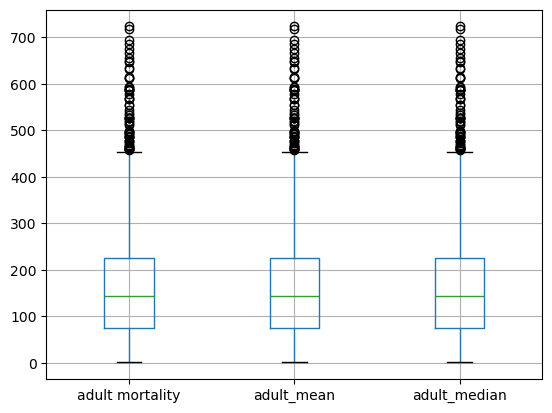

In [17]:
df[['adult mortality','adult_mean','adult_median']].boxplot()
plt.show()

In [18]:
df = df.drop(columns=['adult_mean','adult_median'])

In [19]:
#-----------------------alcohol-----------------

df['alcohol_mean'] = df['alcohol'].fillna(df['alcohol'].mean())
df['alcohol_median'] = df['alcohol'].fillna(df['alcohol'].median())

In [20]:
print('alcohol variance',df['alcohol'].var())
print('alcohol_mean variance',df['alcohol_mean'].var())
print('alcohol_median variance',df['alcohol_median'].var())

alcohol variance 16.528493131839596
alcohol_mean variance 15.434636652068203
alcohol_median variance 15.479762911376742


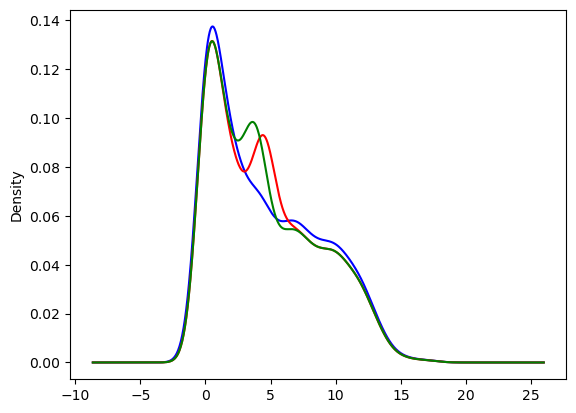

In [21]:
plt.subplot(111)

df['alcohol'].plot.kde(color='blue')

df['alcohol_mean'].plot.kde(color='red')

df['alcohol_median'].plot.kde(color='green')

plt.show()

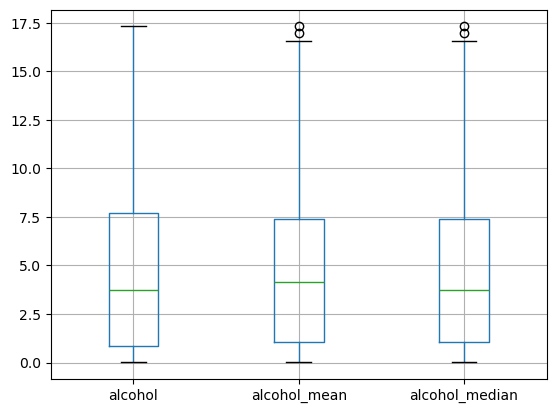

In [22]:
df[['alcohol','alcohol_mean','alcohol_median']].boxplot()
plt.show()

In [23]:
df = df.drop(columns=['alcohol_mean','alcohol_median'])

In [24]:
# end of distribution imputation

lower_alcohol = df['alcohol'].mean() - 3*df['alcohol'].std()
upper_alcohol = df['alcohol'].mean() + 3*df['alcohol'].std()

df['alcohol_lower'] = df['alcohol'].fillna(lower_alcohol)
df['alcohol_upper'] = df['alcohol'].fillna(upper_alcohol)

In [25]:
print('alcohol variance',df['alcohol'].var())
print('alcohol_lower variance',df['alcohol_lower'].var())
print('alcohol_upper variance',df['alcohol_upper'].var())

alcohol variance 16.528493131839596
alcohol_lower variance 24.62813858322042
alcohol_upper variance 24.628138583220537


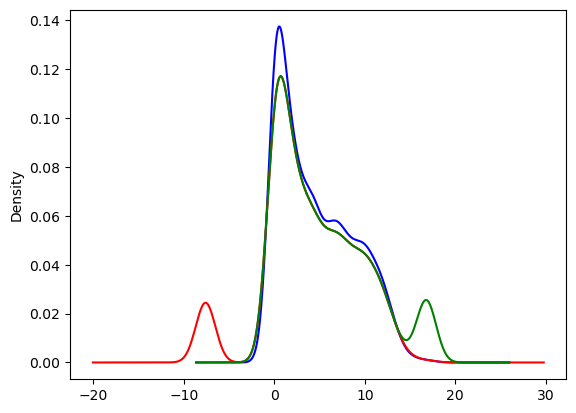

In [26]:
plt.subplot(111)

df['alcohol'].plot.kde(color='blue')

df['alcohol_lower'].plot.kde(color='red')

df['alcohol_upper'].plot.kde(color='green')

plt.show()

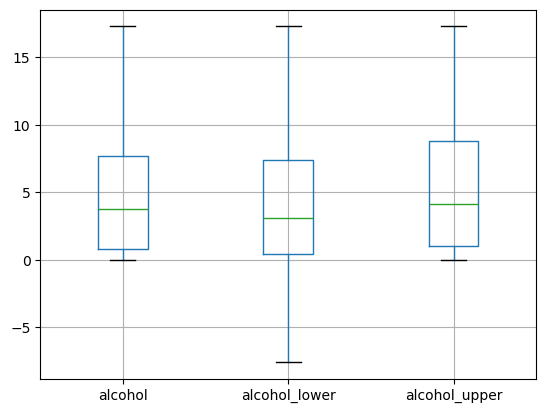

In [27]:
df[['alcohol','alcohol_lower','alcohol_upper']].boxplot()
plt.show()

In [28]:
df = df.drop(columns = ['alcohol_lower','alcohol_upper'])

In [29]:
# second end of distribution imputation

q1_alcohol = df['alcohol'].quantile(0.25)
q3_alcohol = df['alcohol'].quantile(0.75)
iqr = q3_alcohol - q1_alcohol
lower_alcohol = q1_alcohol - 1.5*iqr
upper_alcohol = q3_alcohol + 1.5*iqr

df['alcohol_lower'] = df['alcohol'].fillna(lower_alcohol)
df['alcohol_upper'] = df['alcohol'].fillna(upper_alcohol)

In [30]:
print('alcohol variance',df['alcohol'].var())
print('alcohol_lower variance',df['alcohol_lower'].var())
print('alcohol_upper variance',df['alcohol_upper'].var())

alcohol variance 16.528493131839596
alcohol_lower variance 27.720696436327906
alcohol_upper variance 26.599053692711124


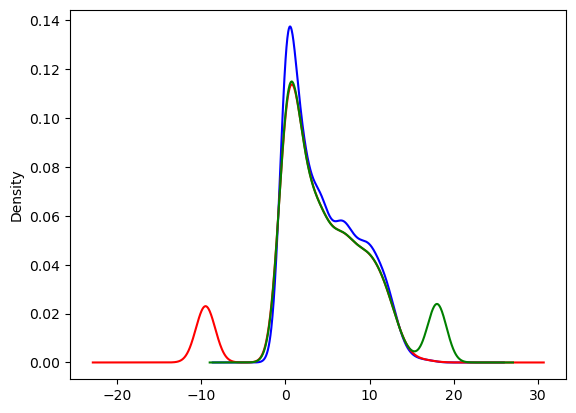

In [31]:
plt.subplot(111)

df['alcohol'].plot.kde(color='blue')

df['alcohol_lower'].plot.kde(color='red')

df['alcohol_upper'].plot.kde(color='green')

plt.show()

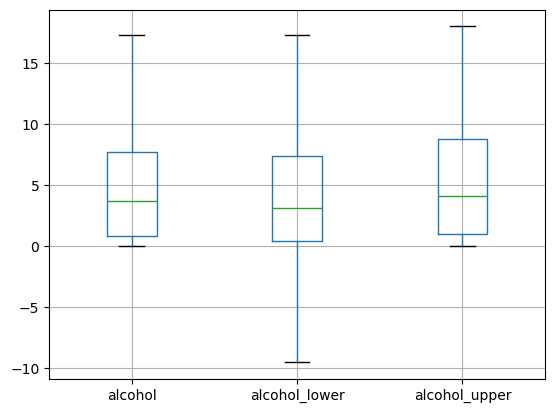

In [32]:
df[['alcohol','alcohol_lower','alcohol_upper']].boxplot()
plt.show()

In [33]:
df = df.drop(columns = ['alcohol_lower','alcohol_upper'])

In [34]:
# alcohol->mean + 3*std

In [35]:
#-----------------------------------hepatitis b------------

df['hepatitis_mean'] = df['hepatitis b'].fillna(df['hepatitis b'].mean())
df['hepatitis_median'] = df['hepatitis b'].fillna(df['hepatitis b'].median())

In [36]:
print('hepatitis variance',df['hepatitis b'].var())
print('hepatitis_mean variance',df['hepatitis_mean'].var())
print('hepatitis_median variance',df['hepatitis_median'].var())

hepatitis variance 621.3171219785185
hepatitis_mean variance 509.44980561255795
hepatitis_median variance 526.8728106923436


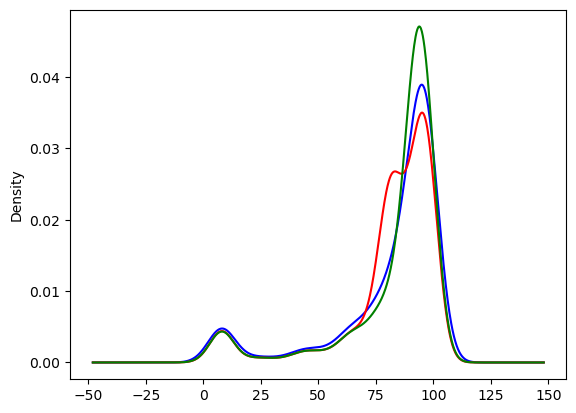

In [37]:
plt.subplot(111)

df['hepatitis b'].plot.kde(color='blue')

df['hepatitis_mean'].plot.kde(color='red')

df['hepatitis_median'].plot.kde(color='green')

plt.show()

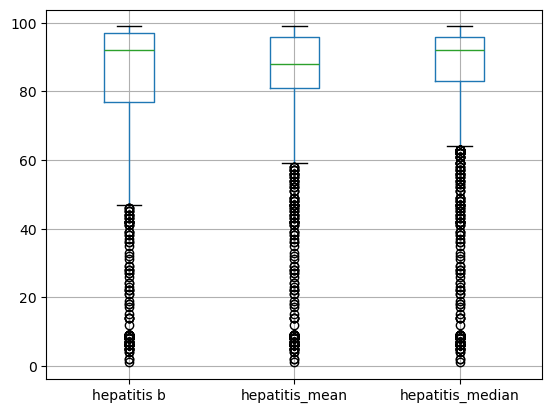

In [38]:
df[['hepatitis b','hepatitis_mean','hepatitis_median']].boxplot()
plt.show()

In [39]:
df = df.drop(columns=['hepatitis_mean','hepatitis_median'])

In [40]:
# end of distribution imputation
q1_hep = df['hepatitis b'].quantile(0.25)
q3_hep = df['hepatitis b'].quantile(0.75)
iqr = q3_hep - q1_hep
lower_hep = q1_hep - 1.5*iqr
upper_hep = q3_hep + 1.5*iqr

df['hepatitis_lower'] = df['hepatitis b'].fillna(lower_hep)
df['hepatitis_upper'] = df['hepatitis b'].fillna(upper_hep)


In [41]:
print('hepatitis variance',df['hepatitis b'].var())
print('hepatitis_lower variance',df['hepatitis_lower'].var())
print('hepatitis_upper variance',df['hepatitis_upper'].var())

hepatitis variance 621.3171219785185
hepatitis_lower variance 681.5079891978423
hepatitis_upper variance 820.012348878613


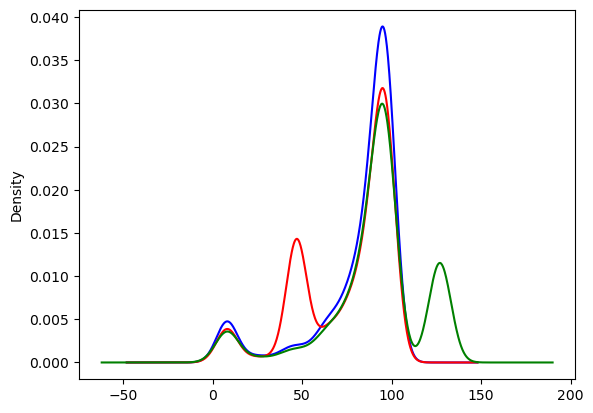

In [42]:
plt.subplot(111)

df['hepatitis b'].plot.kde(color='blue')

df['hepatitis_lower'].plot.kde(color='red')

df['hepatitis_upper'].plot.kde(color='green')

plt.show()

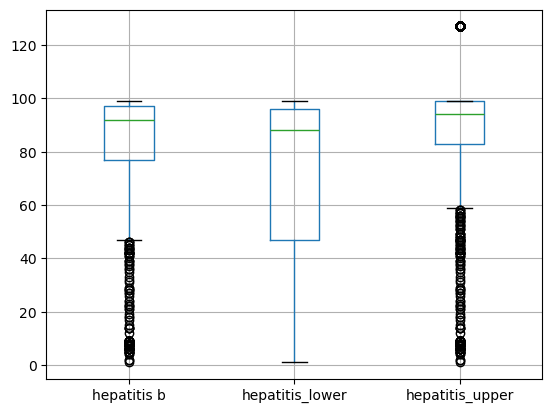

In [43]:
df[['hepatitis b','hepatitis_lower','hepatitis_upper']].boxplot()
plt.show()

In [44]:
df = df.drop(columns=['hepatitis_lower','hepatitis_upper'])

In [45]:
# hepatitis b-> q1 - 1.5*iqr

In [46]:
#---------------------------------polio-------------

df['polio_mean'] = df['polio'].fillna(df['polio'].mean())
df['polio_median'] = df['polio'].fillna(df['polio'].median())

print('polio variance',df['polio'].var())
print('polio_mean variance',df['polio_mean'].var())
print('polio_median variance',df['polio_median'].var())

polio variance 545.1439968612297
polio_mean variance 542.2259511359385
polio_median variance 542.7805142151153


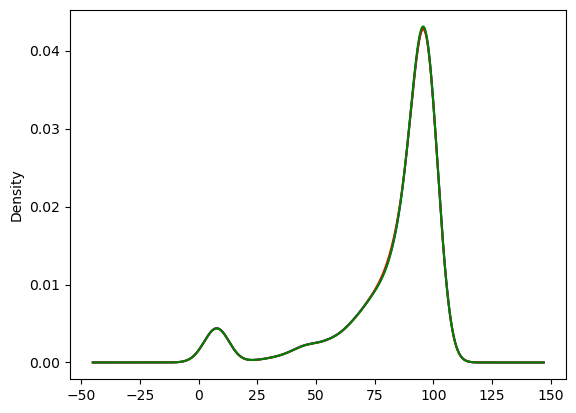

In [47]:
plt.subplot(111)

df['polio'].plot.kde(color='blue')

df['polio_mean'].plot.kde(color='red')

df['polio_median'].plot.kde(color='green')

plt.show()

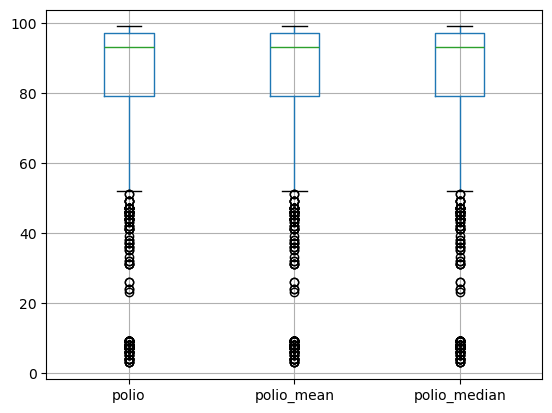

In [48]:
df[['polio','polio_mean','polio_median']].boxplot()
plt.show()

In [49]:
df = df.drop(columns=['polio_mean','polio_median'])

In [50]:
q1_polio = df['polio'].quantile(0.25)
q3_polio = df['polio'].quantile(0.75)
iqr = q3_polio - q1_polio
lower_polio = q1_polio - 1.5*iqr
upper_polio = q3_polio + 1.5*iqr

df['polio_lower'] = df['polio'].fillna(lower_polio)
df['polio_upper'] = df['polio'].fillna(upper_polio)

In [51]:
print('polio variance',df['polio'].var())
print('polio_lower variance',df['polio_lower'].var())
print('polio_upper variance',df['polio_upper'].var())

polio variance 545.1439968612297
polio_lower variance 547.274737519765
polio_upper variance 551.2659670349411


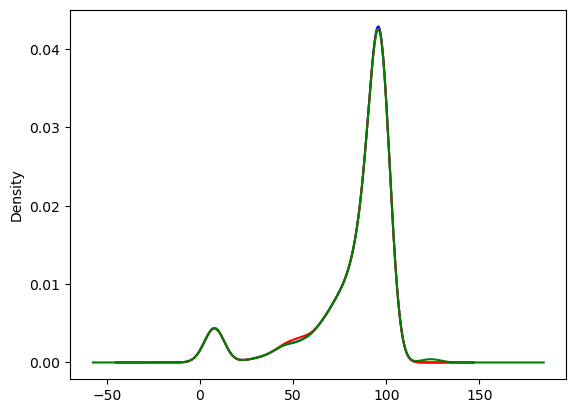

In [52]:
plt.subplot(111)

df['polio'].plot.kde(color='blue')

df['polio_lower'].plot.kde(color='red')

df['polio_upper'].plot.kde(color='green')

plt.show()

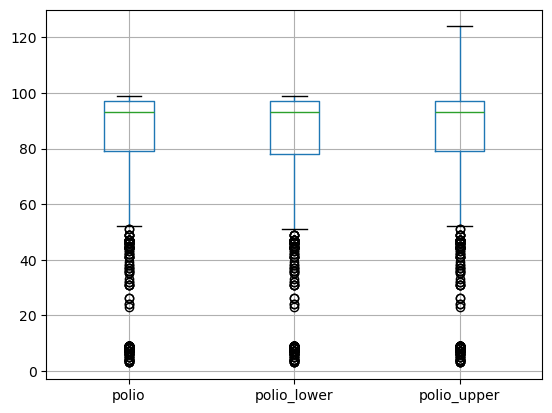

In [53]:
df[['polio','polio_lower','polio_upper']].boxplot()
plt.show()

In [54]:
# polio-> mean

In [55]:
df = df.drop(columns=['polio_lower','polio_upper'])

In [56]:
#-----------------------------------diphtheria----------------

df['diphtheria_mean'] = df['diphtheria'].fillna(df['diphtheria'].mean())
df['diphtheria_median'] = df['diphtheria'].fillna(df['diphtheria'].median())

print('diphtheria variance',df['diphtheria'].var())
print('diphtheria_mean variance',df['diphtheria_mean'].var())
print('diphtheria_median variance',df['diphtheria_median'].var())

diphtheria variance 561.2725635050887
diphtheria_mean variance 558.26818481966
diphtheria_median variance 558.8465939106403


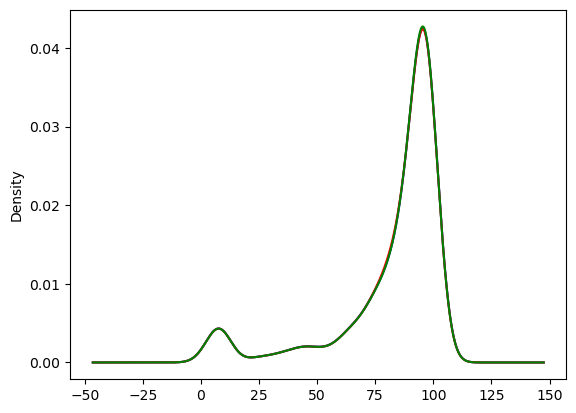

In [57]:
plt.subplot(111)

df['diphtheria'].plot.kde(color='blue')

df['diphtheria_mean'].plot.kde(color='red')

df['diphtheria_median'].plot.kde(color='green')

plt.show()

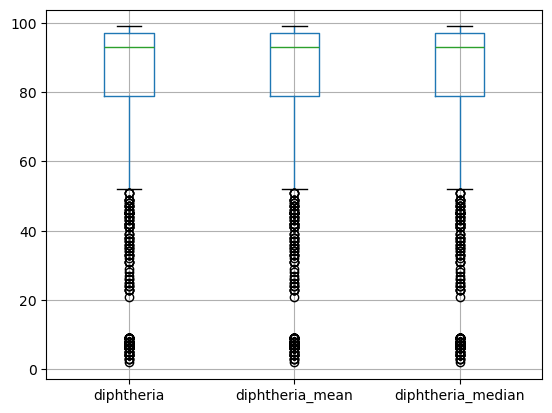

In [58]:
df[['diphtheria','diphtheria_mean','diphtheria_median']].boxplot()
plt.show()

In [59]:
df = df.drop(columns=['diphtheria_mean','diphtheria_median'])

In [60]:
# diphtheria->mean

In [61]:
#------------------------------schooling---------------

df['schooling_mean'] = df['schooling'].fillna(df['schooling'].mean())
df['schooling_median'] = df['schooling'].fillna(df['schooling'].median())

print('schooling variance',df['schooling'].var())
print('schooling_mean variance',df['schooling_mean'].var())
print('schooling_median variance',df['schooling_median'].var())

schooling variance 10.996035738435486
schooling_mean variance 10.41279102043574
schooling_median variance 10.418979380272084


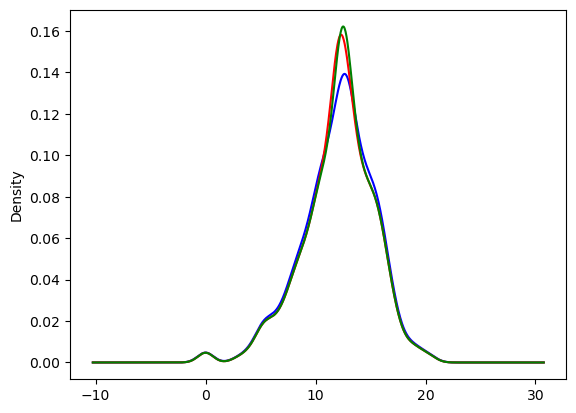

In [62]:
plt.subplot(111)

df['schooling'].plot.kde(color='blue')

df['schooling_mean'].plot.kde(color='red')

df['schooling_median'].plot.kde(color='green')
plt.show()

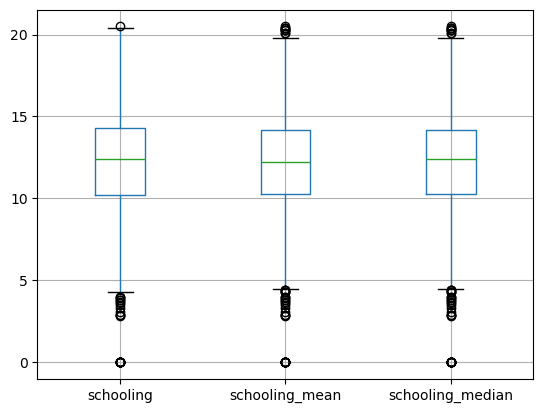

In [63]:
df[['schooling','schooling_mean','schooling_median']].boxplot()
plt.show()

In [64]:
df = df.drop(columns=['schooling_mean','schooling_median'])

In [65]:
#end of distribution imputation

lower_schooling = df['schooling'].mean() - 3*df['schooling'].std()
upper_schooling = df['schooling'].mean() + 3*df['schooling'].std()

df['schooling_lower'] = df['schooling'].fillna(lower_schooling)
df['schooling_upper'] = df['schooling'].fillna(upper_schooling)


In [66]:
print('schooling variance',df['schooling'].var())
print('schooling_lower variance',df['schooling_lower'].var())
print('schooling_upper variance',df['schooling_upper'].var())

schooling variance 10.996035738435486
schooling_lower variance 15.383704052298354
schooling_upper variance 15.383704052298318


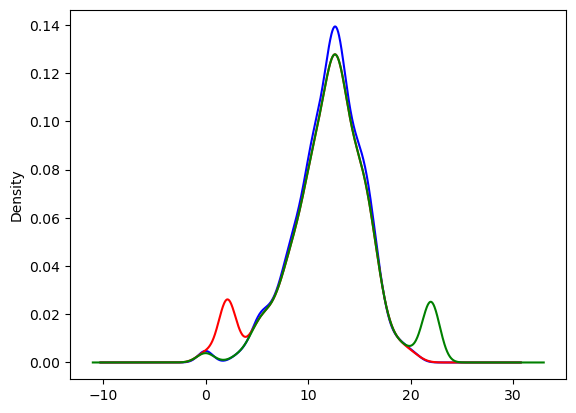

In [67]:
plt.subplot(111)

df['schooling'].plot.kde(color='blue')

df['schooling_lower'].plot.kde(color='red')

df['schooling_upper'].plot.kde(color='green')
plt.show()

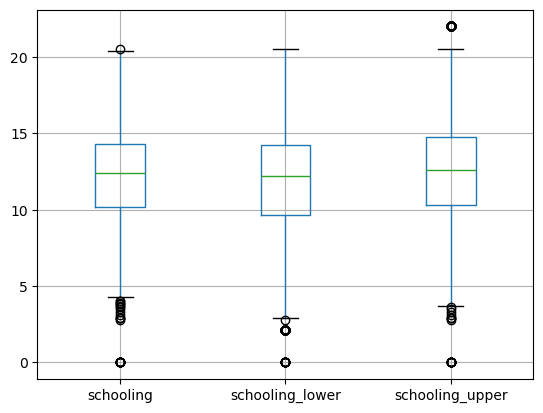

In [68]:
df[['schooling','schooling_lower','schooling_upper']].boxplot()
plt.show()

In [69]:
# schooling-> mean - 3*std

In [70]:
df = df.drop(columns=['schooling_lower','schooling_upper'])

In [113]:
df = df.drop(columns=['thinness 5-9 years'])

In [114]:
df.isnull().sum()

life expectancy          6
adult mortality          6
infant deaths            0
alcohol                136
hepatitis b            370
measles                  0
under five deaths        0
polio                   11
diphtheria              11
hiv/aids                 0
thinness 1-19 years     24
schooling              109
dtype: int64

In [115]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

alcohol_upper = df['alcohol'].mean() + 3*df['alcohol'].std()

q1_hep = df['hepatitis b'].quantile(0.25)
q3_hep = df['hepatitis b'].quantile(0.75)
iqr_hep = q3_hep - q1_hep
hepatitis_lower = q1_hep - 1.5*iqr_hep

schooling_lower = df['schooling'].mean() - 3*df['schooling'].std()

trf1 = ColumnTransformer([
    ('mean_impute',SimpleImputer(strategy='mean'),['life expectancy','adult mortality','polio','diphtheria']),
    ('alcohol_impute',SimpleImputer(strategy='constant',fill_value=alcohol_upper),['alcohol']),
    ('hepatitis_impute',SimpleImputer(strategy='constant',fill_value=hepatitis_lower),['hepatitis b']),
    ('schooling_impute',SimpleImputer(strategy='constant',fill_value=schooling_lower),['schooling'])
],remainder='passthrough')

In [116]:
df1 = trf1.fit_transform(df)

In [117]:
df1 = pd.DataFrame(df1)

In [118]:
df1.rename(columns = {0:'life expectancy',1:'adult mortality',2:'polio',3:'diphtheria',4:'alcohol',5:'hepatitis b',6:'schooling',7:'infant deaths',8:'measles',9:'under five deaths',10:'hiv/aids',11:'thinness 1-19 years'} , inplace=True)

In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   life expectancy      2056 non-null   float64
 1   adult mortality      2056 non-null   float64
 2   polio                2056 non-null   float64
 3   diphtheria           2056 non-null   float64
 4   alcohol              2056 non-null   float64
 5   hepatitis b          2056 non-null   float64
 6   schooling            2056 non-null   float64
 7   infant deaths        2056 non-null   float64
 8   measles              2056 non-null   float64
 9   under five deaths    2056 non-null   float64
 10  hiv/aids             2056 non-null   float64
 11  thinness 1-19 years  2032 non-null   float64
dtypes: float64(12)
memory usage: 192.9 KB


In [120]:
df1 = df1.dropna(ignore_index=True)

In [121]:
df1.isnull().sum()

life expectancy        0
adult mortality        0
polio                  0
diphtheria             0
alcohol                0
hepatitis b            0
schooling              0
infant deaths          0
measles                0
under five deaths      0
hiv/aids               0
thinness 1-19 years    0
dtype: int64

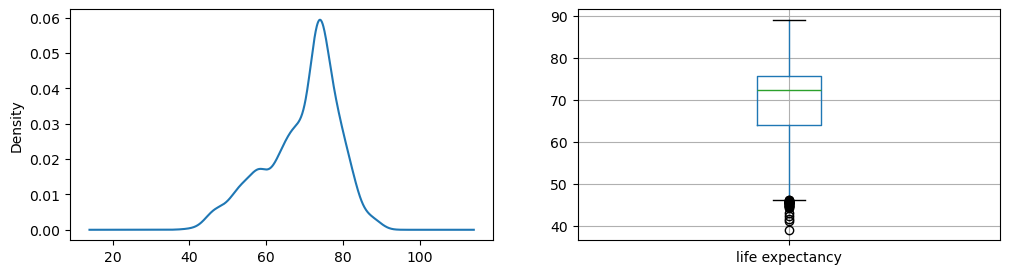

In [122]:
#---------------------------------outlier remove for life expectancy----------------------
plt.figure(figsize=(12,3))
plt.subplot(121)
df1['life expectancy'].plot.kde()
plt.subplot(122)
df1[['life expectancy']].boxplot()
plt.show()

In [123]:
# using percentile method

lower_life = df1['life expectancy'].quantile(0.01)
upper_life = df1['life expectancy'].quantile(0.99)

df1['life expectancy'] = np.where(
    df1['life expectancy'] > upper_life,
    upper_life,
    np.where(
        df1['life expectancy'] < lower_life,
        lower_life,
        df1['life expectancy']
    )
)

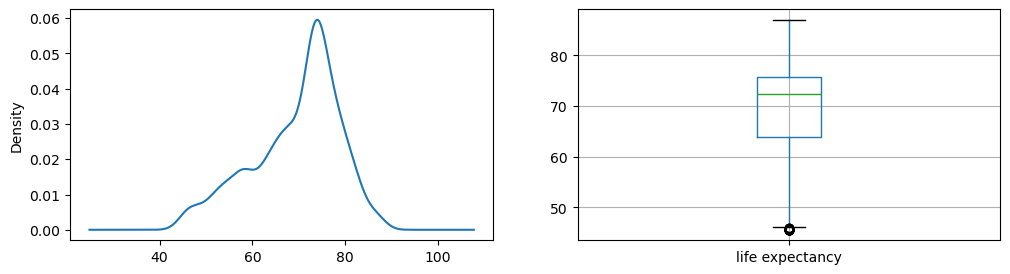

In [124]:
plt.figure(figsize=(12,3))
plt.subplot(121)
df1['life expectancy'].plot.kde()
plt.subplot(122)
df1[['life expectancy']].boxplot()
plt.show()

In [125]:
df1['life expectancy'].describe()

count    2032.000000
mean       69.522824
std         9.334135
min        45.600000
25%        63.875000
50%        72.300000
75%        75.725000
max        87.000000
Name: life expectancy, dtype: float64

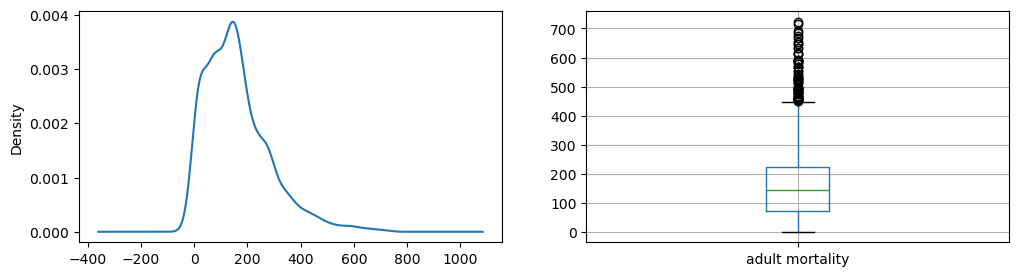

In [126]:
#-----------------------------------------outlier remove for adult mortality-----------
plt.figure(figsize=(12,3))
plt.subplot(121)
df1['adult mortality'].plot.kde()
plt.subplot(122)
df1[['adult mortality']].boxplot()
plt.show()

In [127]:
df1['adult mortality'].skew()

1.2224880956072182

In [128]:
# using IQR method
q1_adult = df1['adult mortality'].quantile(0.25)
q3_adult = df1['adult mortality'].quantile(0.75)
iqr_adult = q3_adult - q1_adult
lower_adult = q1_adult - 1.5*iqr_adult
upper_adult = q3_adult + 1.5*iqr_adult
upper_adult

449.375

In [129]:
df1['adult mortality'] = np.where(
    df1['adult mortality'] > upper_adult,
    upper_adult,
    np.where(
        df1['adult mortality'] < lower_adult,
        lower_adult,
        df1['adult mortality'] 
    )
)

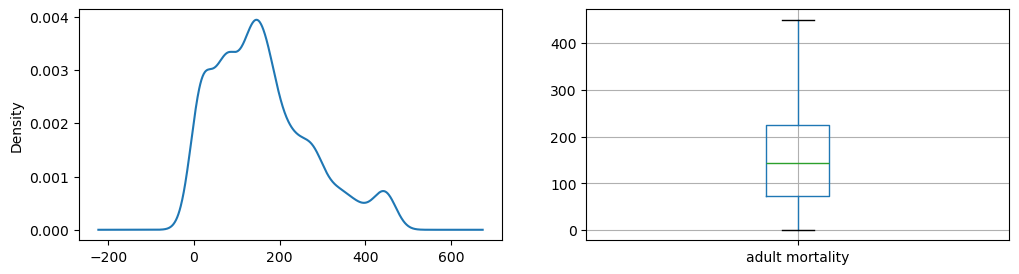

In [130]:
plt.figure(figsize=(12,3))
plt.subplot(121)
df1['adult mortality'].plot.kde()
plt.subplot(122)
df1[['adult mortality']].boxplot()
plt.show()

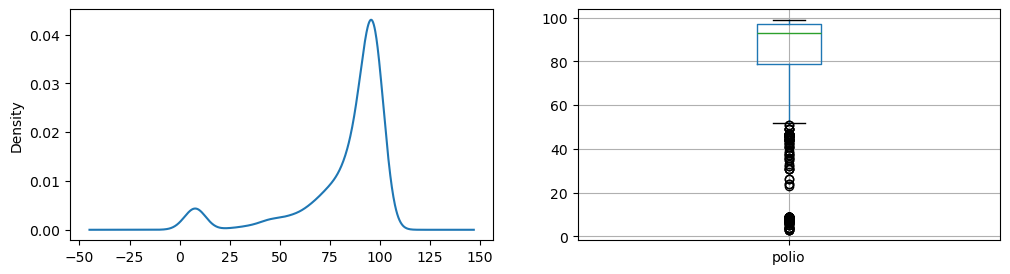

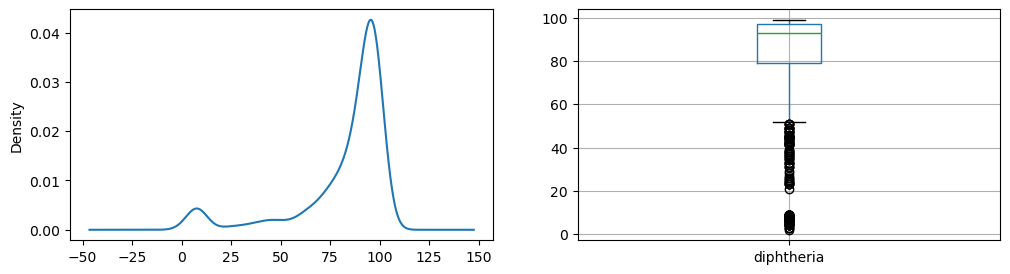

In [131]:
#--------------------------------------polio & diphtheria-----------------
plt.figure(figsize=(12,3))
plt.subplot(121)
df1['polio'].plot.kde()
plt.subplot(122)
df1[['polio']].boxplot()

plt.figure(figsize=(12,3))
plt.subplot(121)
df1['diphtheria'].plot.kde()
plt.subplot(122)
df1[['diphtheria']].boxplot()

plt.show()

In [132]:
print(df1['polio'].skew())
print(df1['diphtheria'].skew())

-2.1450033377706332
-2.1295534637143922


In [133]:
# using IQR method
q1_polio = df1['polio'].quantile(0.25)
q3_polio = df1['polio'].quantile(0.75)
iqr_polio = q3_polio - q1_polio
lower_polio = q1_polio - 1.5*iqr_polio
upper_polio = q3_polio + 1.5*iqr_polio
print(lower_polio)

q1_diphtheria = df1['diphtheria'].quantile(0.25)
q3_diphtheria = df1['diphtheria'].quantile(0.75)
iqr_diphtheria = q3_diphtheria - q1_diphtheria
lower_diphtheria = q1_diphtheria - 1.5*iqr_diphtheria
upper_diphtheria = q3_diphtheria + 1.5*iqr_diphtheria
print(lower_diphtheria)

52.0
52.0


In [134]:
df1['polio'] = np.where(
    df1['polio'] > upper_polio,
    upper_polio,
    np.where(
        df1['polio'] < lower_polio,
        lower_polio,
        df1['polio'] 
    )
)

df1['diphtheria'] = np.where(
    df1['diphtheria'] > upper_diphtheria,
    upper_diphtheria,
    np.where(
        df1['diphtheria'] < lower_diphtheria,
        lower_diphtheria,
        df1['diphtheria'] 
    )
)

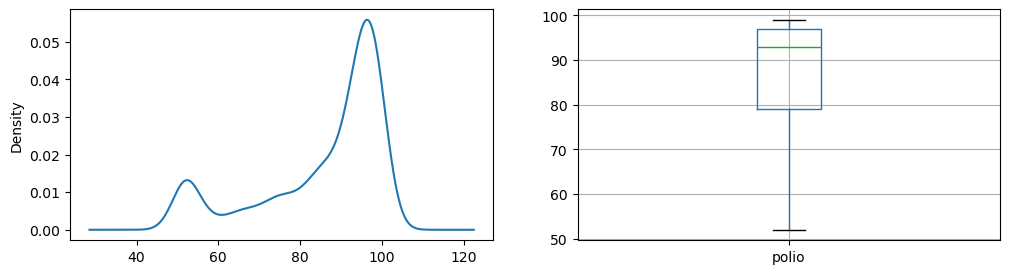

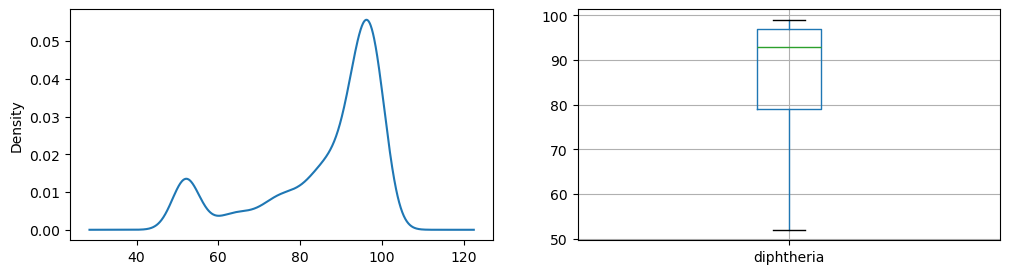

In [135]:
plt.figure(figsize=(12,3))
plt.subplot(121)
df1['polio'].plot.kde()
plt.subplot(122)
df1[['polio']].boxplot()

plt.figure(figsize=(12,3))
plt.subplot(121)
df1['diphtheria'].plot.kde()
plt.subplot(122)
df1[['diphtheria']].boxplot()

plt.show()

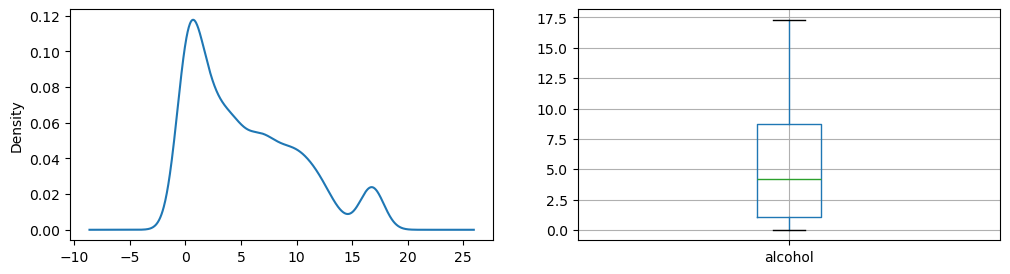

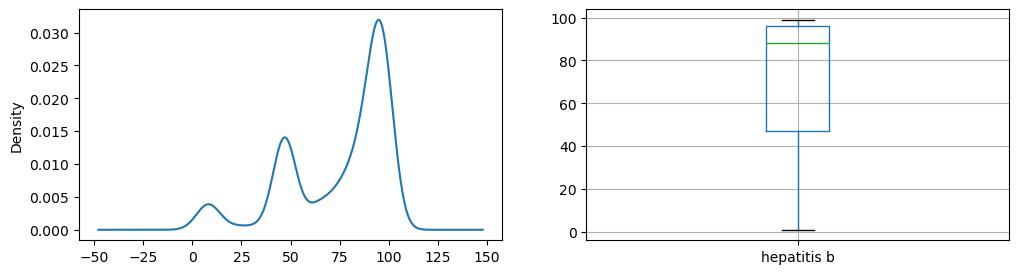

In [136]:
#------------------------------------alcohol & hepatitis b-----------------------
df1.isnull().sum()

plt.figure(figsize=(12,3))
plt.subplot(121)
df1['alcohol'].plot.kde()
plt.subplot(122)
df1[['alcohol']].boxplot()

plt.figure(figsize=(12,3))
plt.subplot(121)
df1['hepatitis b'].plot.kde()
plt.subplot(122)
df1[['hepatitis b']].boxplot()

plt.show()

<Axes: >

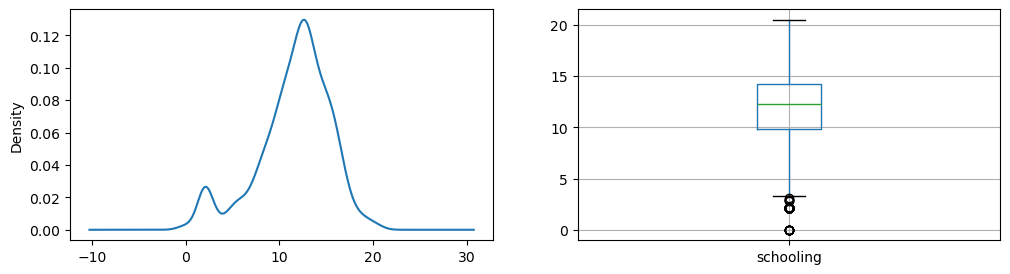

In [137]:
#------------------------------------------schooling-----------------

plt.figure(figsize=(12,3))
plt.subplot(121)
df1['schooling'].plot.kde()
plt.subplot(122)
df1[['schooling']].boxplot()

In [138]:
# using IQR method
q1_schooling = df1['schooling'].quantile(0.25)
q3_schooling = df1['schooling'].quantile(0.75)
iqr_schooling = q3_schooling - q1_schooling
lower_schooling = q1_schooling - 1.5*iqr_schooling
upper_schooling = q3_schooling + 1.5*iqr_schooling
lower_schooling

3.200000000000003

In [139]:
df1['schooling'] = np.where(
    df1['schooling'] > upper_schooling,
    upper_schooling,
    np.where(
        df1['schooling'] < lower_schooling,
        lower_schooling,
        df1['schooling'] 
    )
)

<Axes: >

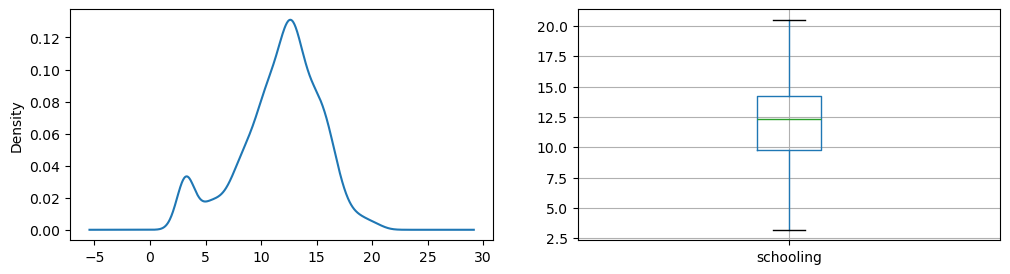

In [140]:
plt.figure(figsize=(12,3))
plt.subplot(121)
df1['schooling'].plot.kde()
plt.subplot(122)
df1[['schooling']].boxplot()

In [141]:
df1['schooling'].describe()

count    2032.000000
mean       11.683366
std         3.666156
min         3.200000
25%         9.800000
50%        12.300000
75%        14.200000
max        20.500000
Name: schooling, dtype: float64

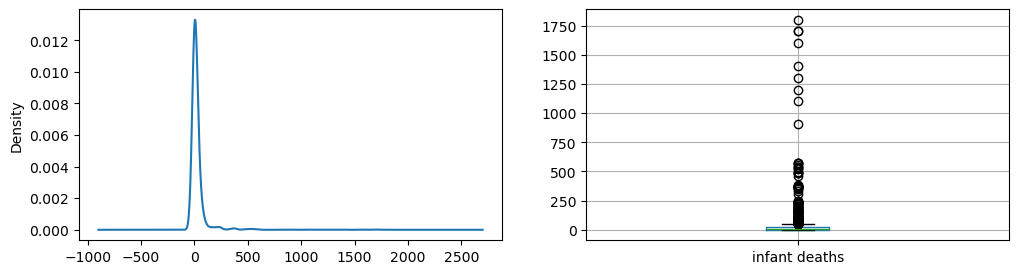

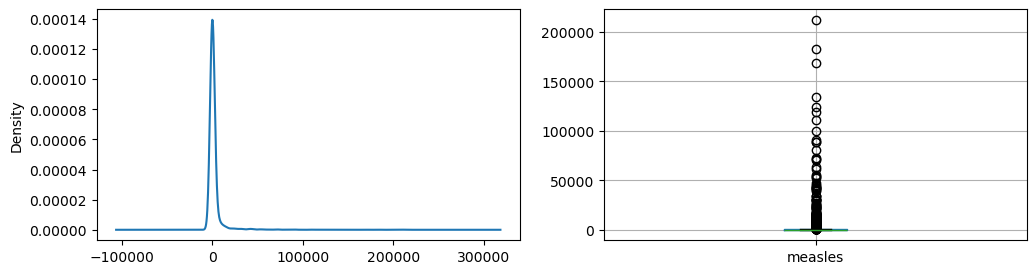

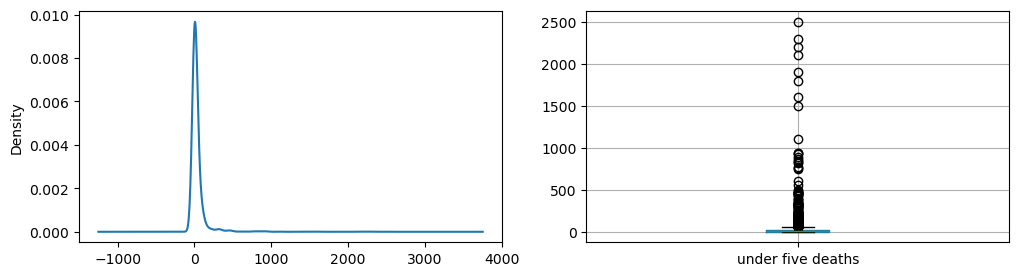

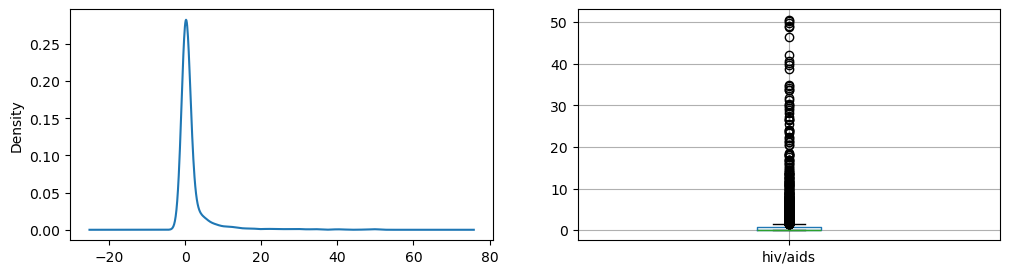

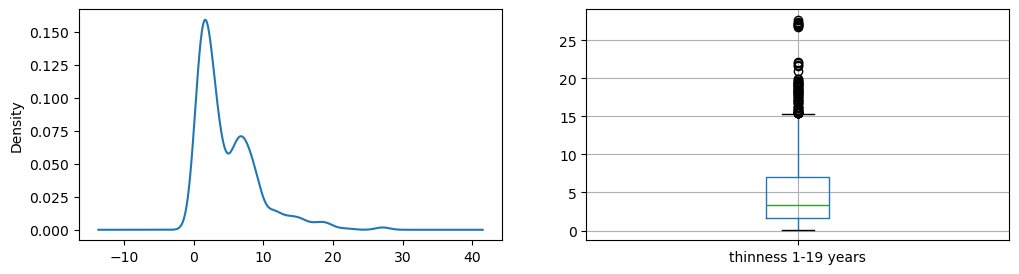

In [142]:
#----------------------------------------infant deaths ,measles & under five deaths ,hiv/aids,thinness 1-19 years ------------------

plt.figure(figsize=(12,3))
plt.subplot(121)
df1['infant deaths'].plot.kde()
plt.subplot(122)
df1[['infant deaths']].boxplot()

plt.figure(figsize=(12,3))
plt.subplot(121)
df1['measles'].plot.kde()
plt.subplot(122)
df1[['measles']].boxplot()

plt.figure(figsize=(12,3))
plt.subplot(121)
df1['under five deaths'].plot.kde()
plt.subplot(122)
df1[['under five deaths']].boxplot()

plt.figure(figsize=(12,3))
plt.subplot(121)
df1['hiv/aids'].plot.kde()
plt.subplot(122)
df1[['hiv/aids']].boxplot()

plt.figure(figsize=(12,3))
plt.subplot(121)
df1['thinness 1-19 years'].plot.kde()
plt.subplot(122)
df1[['thinness 1-19 years']].boxplot()

plt.show()

In [143]:
print(df1['infant deaths'].skew())
print(df1['measles'].skew())
print(df1['under five deaths'].skew())
print(df1['hiv/aids'].skew())
print(df1['thinness 1-19 years'].skew())

10.29218941757014
10.212825152688037
9.951003455406692
5.458571920430973
1.6749200084152065


In [144]:
#using IQR method

q1_infant = df1['infant deaths'].quantile(0.25)
q3_infant = df1['infant deaths'].quantile(0.75)
iqr_infant = q3_infant - q1_infant
lower_infant = q1_infant - 1.5*iqr_infant
upper_infant = q3_infant + 1.5*iqr_infant
print(upper_infant)

q1_measles = df1['measles'].quantile(0.25)
q3_measles = df1['measles'].quantile(0.75)
iqr_measles = q3_measles - q1_measles
lower_measles = q1_measles - 1.5*iqr_measles
upper_measles = q3_measles + 1.5*iqr_measles
print(upper_measles)

q1_under = df1['under five deaths'].quantile(0.25)
q3_under = df1['under five deaths'].quantile(0.75)
iqr_under = q3_under - q1_under
lower_under = q1_under - 1.5*iqr_under
upper_under = q3_under + 1.5*iqr_under
print(upper_under)

q1_hiv = df1['hiv/aids'].quantile(0.25)
q3_hiv = df1['hiv/aids'].quantile(0.75)
iqr_hiv = q3_hiv - q1_hiv
lower_hiv = q1_hiv - 1.5*iqr_hiv
upper_hiv = q3_hiv + 1.5*iqr_hiv
print(upper_hiv)

q1_thinness = df1['thinness 1-19 years'].quantile(0.25)
q3_thinness = df1['thinness 1-19 years'].quantile(0.75)
iqr_thinness = q3_thinness - q1_thinness
lower_thinness = q1_thinness - 1.5*iqr_thinness
upper_thinness = q3_thinness + 1.5*iqr_thinness
print(upper_thinness)

50.0
930.0
60.0
1.5999999999999999
15.35


In [145]:
df1['infant deaths'] = np.where(
    df1['infant deaths'] > upper_infant,
    upper_infant,
    np.where(
        df1['infant deaths'] < lower_infant,
        lower_infant,
        df1['infant deaths']
    )
)

df1['measles'] = np.where(
    df1['measles'] > upper_measles,
    upper_measles,
    np.where(
        df1['measles'] < lower_measles,
        lower_measles,
        df1['measles']
    )
)

df1['under five deaths'] = np.where(
    df1['under five deaths'] > upper_under,
    upper_under,
    np.where(
        df1['under five deaths'] < lower_under,
        lower_under,
        df1['under five deaths']
    )
)

df1['hiv/aids'] = np.where(
    df1['hiv/aids'] > upper_hiv,
    upper_hiv,
    np.where(
        df1['hiv/aids'] < lower_hiv,
        lower_hiv,
        df1['hiv/aids']
    )
)

df1['thinness 1-19 years'] = np.where(
    df1['thinness 1-19 years'] > upper_thinness,
    upper_thinness,
    np.where(
        df1['thinness 1-19 years'] < lower_thinness,
        lower_thinness,
        df1['thinness 1-19 years']
    )
)

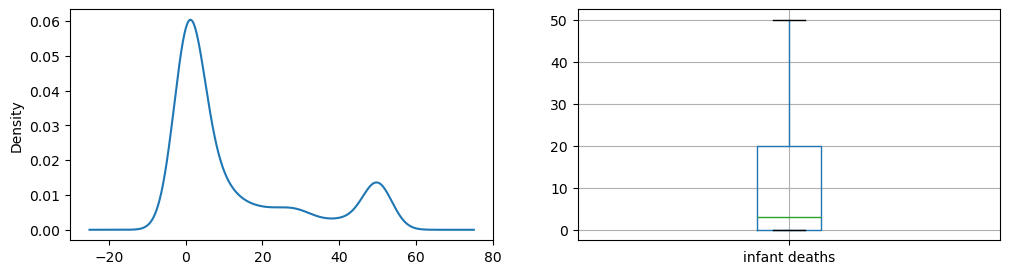

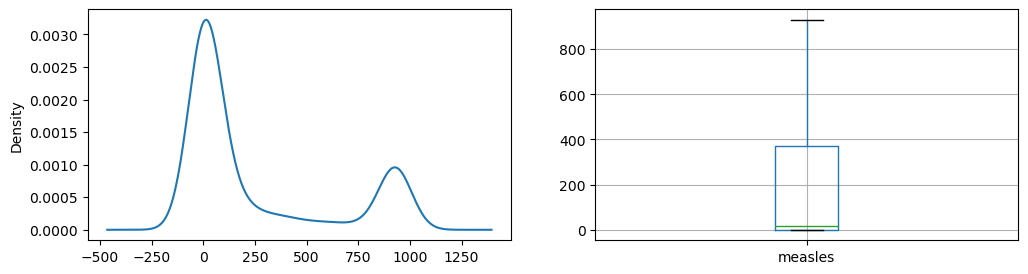

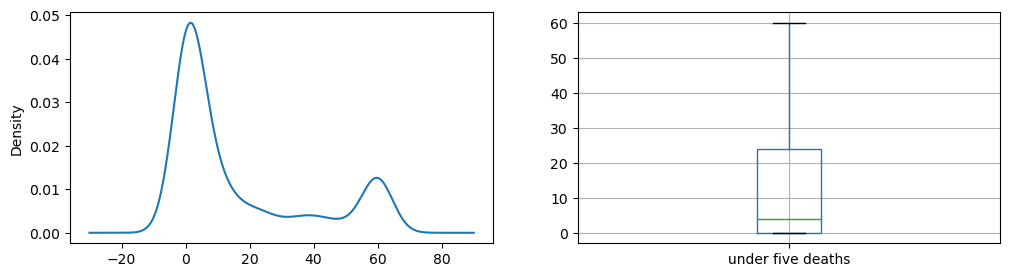

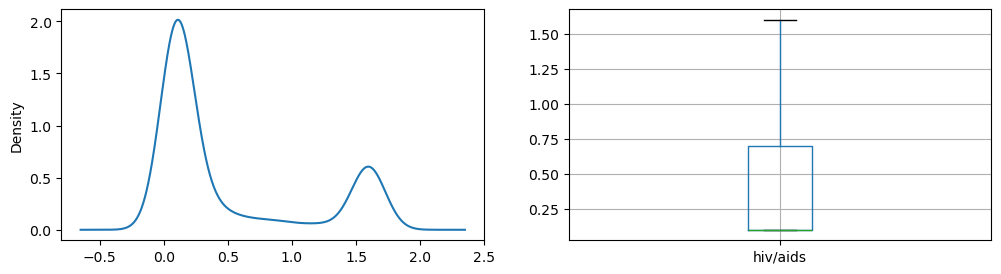

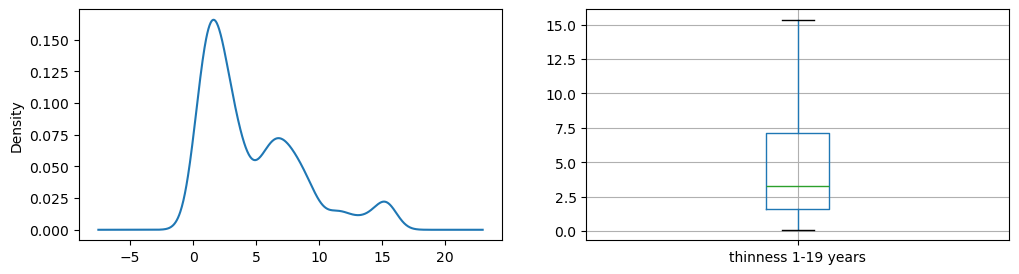

In [146]:
plt.figure(figsize=(12,3))
plt.subplot(121)
df1['infant deaths'].plot.kde()
plt.subplot(122)
df1[['infant deaths']].boxplot()

plt.figure(figsize=(12,3))
plt.subplot(121)
df1['measles'].plot.kde()
plt.subplot(122)
df1[['measles']].boxplot()

plt.figure(figsize=(12,3))
plt.subplot(121)
df1['under five deaths'].plot.kde()
plt.subplot(122)
df1[['under five deaths']].boxplot()

plt.figure(figsize=(12,3))
plt.subplot(121)
df1['hiv/aids'].plot.kde()
plt.subplot(122)
df1[['hiv/aids']].boxplot()

plt.figure(figsize=(12,3))
plt.subplot(121)
df1['thinness 1-19 years'].plot.kde()
plt.subplot(122)
df1[['thinness 1-19 years']].boxplot()

plt.show()

EDA

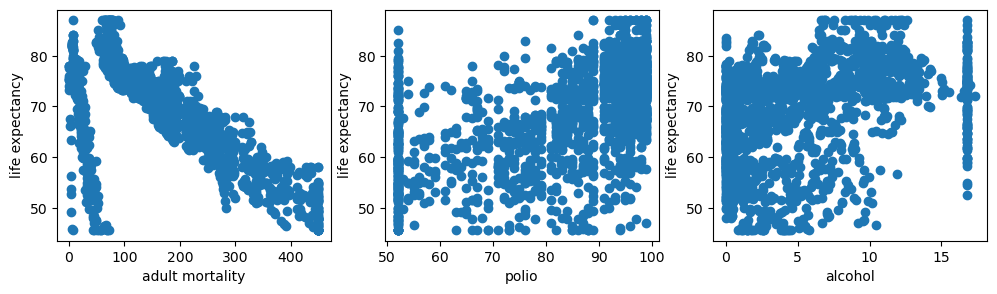

In [104]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.scatter(df1['adult mortality'],df1['life expectancy'])
plt.xlabel('adult mortality')
plt.ylabel('life expectancy')
plt.subplot(132)
plt.scatter(df1['polio'],df1['life expectancy'])
plt.xlabel('polio')
plt.ylabel('life expectancy')
plt.subplot(133)
plt.scatter(df1['alcohol'],df1['life expectancy'])
plt.xlabel('alcohol')
plt.ylabel('life expectancy')
plt.show()

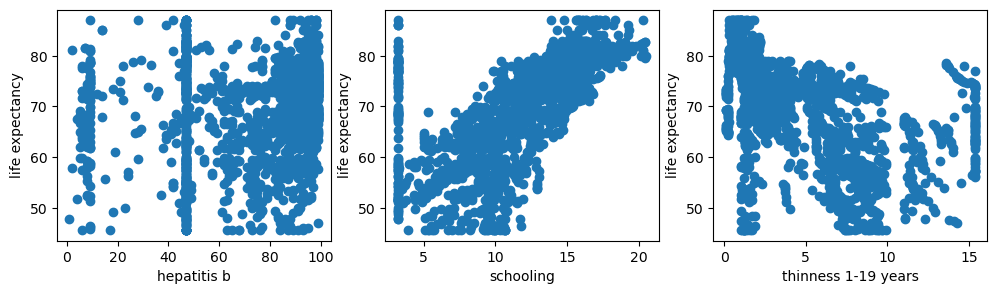

In [105]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.scatter(df1['hepatitis b'],df1['life expectancy'])
plt.xlabel('hepatitis b')
plt.ylabel('life expectancy')
plt.subplot(132)
plt.scatter(df1['schooling'],df1['life expectancy'])
plt.xlabel('schooling')
plt.ylabel('life expectancy')
plt.subplot(133)
plt.scatter(df1['thinness 1-19 years'],df1['life expectancy'])
plt.xlabel('thinness 1-19 years')
plt.ylabel('life expectancy')
plt.show()

Feature Engineering

In [147]:
X = df1.drop(columns=['life expectancy'])
y = df1['life expectancy']

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trf = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X_trf,y,test_size=0.2,random_state=3)

In [46]:
X_train.shape,X_test.shape

((1625, 11), (407, 11))

Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)
print('Linear Regression :')
print('r2_score',r2_score(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print('cross_val_score', np.mean(cross_val_score(lr , X_trf , y , scoring='r2' , cv=10)))

Linear Regression :
r2_score 0.8120599518050007
RMSE 4.066513909886408
cross_val_score 0.8083447901641605


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias=True)

X_trf_trans = poly.fit_transform(X_trf)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans,y_train)

y_pred_lr = lr.predict(X_test_trans)
print('Linear Regression :')
print('r2_score',r2_score(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print('cross_val_score', np.mean(cross_val_score(lr , X_trf_trans , y , scoring='r2' , cv=10)))

Linear Regression :
r2_score 0.8924020062619413
RMSE 3.0769092119461248
cross_val_score 0.8917250304592474


SGDRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param = {
    'penalty':['l1','l2'],
    'max_iter':[50,100,1000,2000,2500],
    'learning_rate':['constant','invscaling'],
    'eta0':[0.2,0.1,0.01,0.001,0.05,0.005]
}

search = RandomizedSearchCV(estimator=sgd , param_distributions=param , cv=5)
search.fit(X_train,y_train)
print(search.best_score_)
print(search.best_params_)

In [335]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=1000, random_state=13)
sgd.fit(X_train_trans,y_train)

y_pred_sgd = sgd.predict(X_test_trans)
print('SGDRegressor :')
print('r2_score',r2_score(y_test,y_pred_sgd))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_sgd)))
print('cross_val_score', np.mean(cross_val_score(sgd , X_trf_trans , y , scoring='r2' , cv=10)))

SGDRegressor :
r2_score 0.8856137922354794
RMSE 3.172483896460241
cross_val_score 0.8892192244103597


DecisionTreeRegressor

In [363]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='squared_error',splitter='best',max_depth=8,max_features=None)
dt.fit(X_train_trans,y_train)

y_pred_dt = dt.predict(X_test_trans)
print('DecisionTreeRegressor :')
print('r2_score',r2_score(y_test,y_pred_dt))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_dt)))
print('cross_val_score', np.mean(cross_val_score(dt , X_trf_trans , y , scoring='r2' , cv=10)))

DecisionTreeRegressor :
r2_score 0.9023841089054837
RMSE 2.9307100715434813
cross_val_score 0.8900189201024997


RandomForestRegressor

In [150]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,max_depth=8,max_samples=0.9,bootstrap=True,max_features=None)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)
print('RandomForestRegressor :')
print('r2_score',r2_score(y_test,y_pred_rf))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print('cross_val_score', np.mean(cross_val_score(rf , X_trf , y , scoring='r2' , cv=5)))

RandomForestRegressor :
r2_score 0.9451126778699644
RMSE 2.1975998491452224
cross_val_score 0.9423557152885209


GradientBoostingRegressor

In [149]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_leaf_nodes=8 , n_estimators=500 , max_depth=8 , learning_rate=0.2)
gbr.fit(X_train,y_train)

y_pred_gbr = gbr.predict(X_test)
print('GradientBoostingRegressor :')
print('r2_score',r2_score(y_test,y_pred_gbr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_gbr)))
print('cross_val_score', np.mean(cross_val_score(gbr , X_trf , y , scoring='r2' , cv=5)))

GradientBoostingRegressor :
r2_score 0.9510297093612934
RMSE 2.075768589945162
cross_val_score 0.9531763730346535


In [393]:
from sklearn.model_selection import RandomizedSearchCV

param = {
    'n_estimators':[100,500,1000],
    'max_depth':[1,3,5,7,8,9],
    'max_leaf_nodes':[1,3,5,8,10,13,15],
    'learning_rate':[0.2,0.1,0.3,0.4,0.5,0.6]
}

search = RandomizedSearchCV(estimator=gbr , param_distributions=param , cv=5)
search.fit(X_train,y_train)
print(search.best_score_)
print(search.best_params_)

D:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "D:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "D:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "D:\ProgramData\anaconda3\Lib\site-packages\sk

0.9469627812273324
{'n_estimators': 500, 'max_leaf_nodes': 8, 'max_depth': 8, 'learning_rate': 0.2}


SVR

In [422]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

y_pred_svr = svr.predict(X_test)
print('SupportVectorRegressor :')
print('r2_score',r2_score(y_test,y_pred_svr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_svr)))
print('cross_val_score', np.mean(cross_val_score(svr , X_trf , y , scoring='r2' , cv=5)))

SupportVectorRegressor :
r2_score 0.8567371842375759
RMSE 3.550416773129694
cross_val_score 0.8542595126196586


XGBoost

In [151]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(booster='dart',learning_rate=0.1,max_depth=8 , random_state=13)
xgbr.fit(X_train,y_train)

y_pred_xgbr = xgbr.predict(X_test)
print('XGBRegressor :')
print('r2_score',r2_score(y_test,y_pred_xgbr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))
print('cross_val_score', np.mean(cross_val_score(xgbr , X_trf , y , scoring='r2' , cv=5)))

XGBRegressor :
r2_score 0.9533352053540002
RMSE 2.026316471537876
cross_val_score 0.9478619213421512


VotingRegressor

In [152]:
from sklearn.ensemble import VotingRegressor

estimators=[('rf',rf),('gbr',gbr),('xgbr',xgbr)]

model = VotingRegressor(estimators=estimators , weights=[1,2,3])
model.fit(X_train,y_train)

y_pred_vr = model.predict(X_test)
print('VotingRegressor :')
print('r2_score',r2_score(y_test,y_pred_vr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_vr)))
print('cross_val_score', np.mean(cross_val_score(model , X_trf , y , scoring='r2' , cv=5)))

VotingRegressor :
r2_score 0.9559311520401975
RMSE 1.9691483865832153
cross_val_score 0.9548680297118658


In [53]:
X.columns

Index(['adult mortality', 'polio', 'diphtheria', 'alcohol', 'hepatitis b',
       'schooling', 'infant deaths', 'measles', 'under five deaths',
       'hiv/aids', 'thinness 1-19 years'],
      dtype='object')

In [153]:
feature_columns = ['adult mortality', 'polio', 'diphtheria', 'alcohol', 'hepatitis b',
       'schooling', 'infant deaths', 'measles', 'under five deaths',
       'hiv/aids', 'thinness 1-19 years']

In [155]:
import joblib

joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(feature_columns, 'features.pkl')


['features.pkl']

In [125]:
X

,adult mortality,polio,diphtheria,alcohol,hepatitis b,schooling,infant deaths,measles,under five deaths,hiv/aids,thinness 1-19 years
0,64.0,72.0,72.0,7.14,86.0,14.6,0.0,1.0,0.0,0.1,0.7
1,394.0,62.0,62.0,2.03,47.0,9.4,8.0,146.0,13.0,1.6,8.8
2,283.0,91.0,92.0,4.55,92.0,5.9,44.0,930.0,60.0,1.1,9.3
3,289.0,85.0,86.0,3.57,86.0,9.0,4.0,0.0,7.0,1.6,7.8
4,217.0,84.0,86.0,0.26,85.0,8.1,50.0,930.0,60.0,0.6,13.2
...,...,...,...,...,...,...,...,...,...,...,...
2027,59.0,96.0,96.0,6.91,82.0,14.8,0.0,3.0,0.0,0.1,0.8
2028,287.0,82.0,83.0,3.21,83.0,8.9,4.0,26.0,7.0,1.6,8.0
2029,266.0,62.0,63.0,6.08,47.0,8.4,17.0,0.0,23.0,1.6,4.2
2030,72.0,97.0,96.0,9.30,95.0,15.4,2.0,930.0,3.0,0.1,0.5
